Group 2

Group members: Vidhi Sikawar, Diya Singh, Parisa Chatrath, Sia Malik

In [ ]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

In [ ]:
dataset = pd.read_csv("Large_Operations_Dataset.csv")    #reading datafile
dataset.head()    #checking data is properly loaded

,Order_Volume,Priority,Lead_Time,Machine_Uptime,Defect_Rate,Production_Time,Stock_Levels,Demand_Forecast_Accuracy,Supplier_On_Time,Supplier_Quality_Rating,Shipping_Cost,Transport_Mode,Delivery_Time,On_Time_Delivery
0,394,2,3,81.608343,2.629805,5.034411,323,57.844723,73.794648,3.314095,247.486263,1,5,0
1,227,2,9,91.763824,1.949442,4.980838,23,93.486251,91.404743,4.278515,241.035278,0,17,0
2,364,1,4,80.342491,2.508567,7.186772,89,83.692943,99.291128,4.093710,199.925322,3,18,0
3,374,0,1,91.155637,1.060094,6.791240,489,81.626393,67.553755,3.740387,364.121034,3,13,0
4,467,0,11,87.004033,1.815989,2.477688,146,82.583565,64.564488,4.729925,416.526355,0,7,0


# **Exploratory Data Analysis**

Mean: 274.8624
Median: 275.0


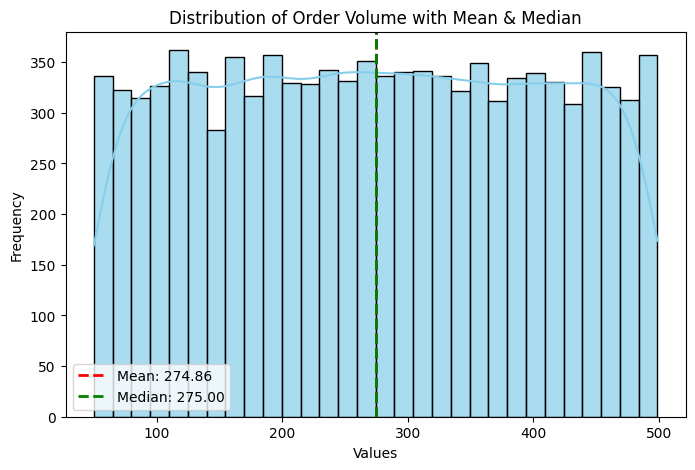

In [ ]:
column = dataset["Order_Volume"]

# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Order Volume with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 6.038715713947593
Median: 6.045432090234334


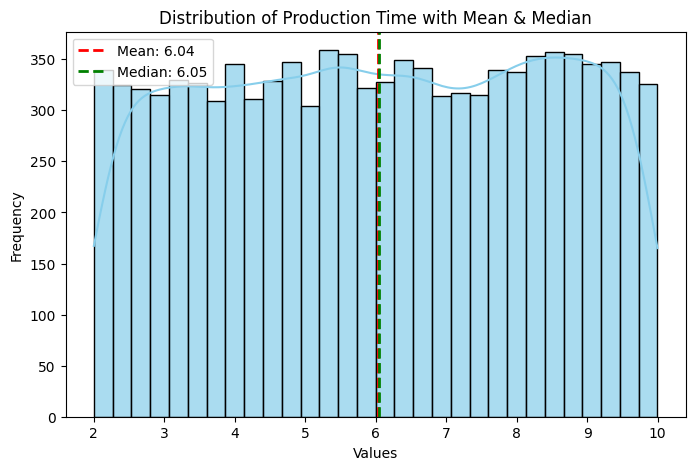

In [ ]:
column = dataset["Production_Time"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Production Time with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 249.731
Median: 250.0


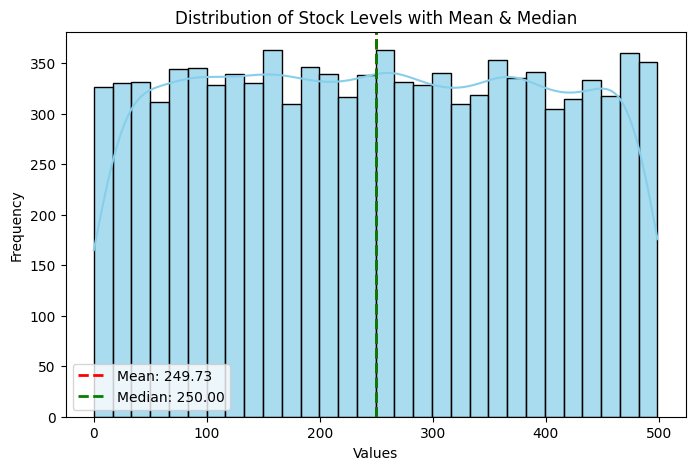

In [ ]:
column = dataset["Stock_Levels"]

# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Stock Levels with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 10.0323
Median: 10.0


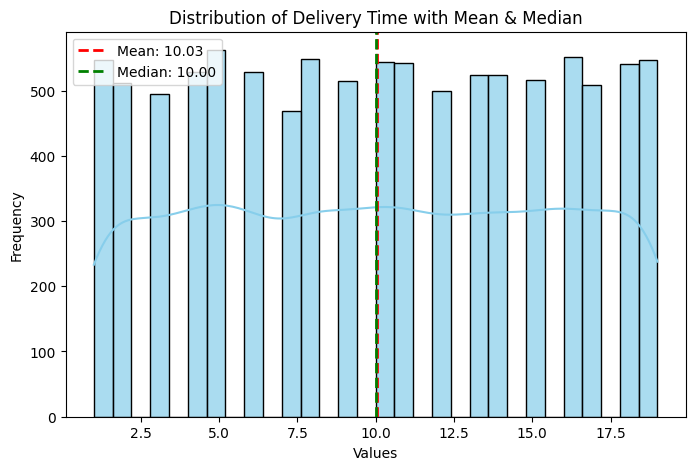

In [ ]:
column = dataset["Delivery_Time"]

# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time with Mean & Median")
plt.legend()

# Show the plot
plt.show()

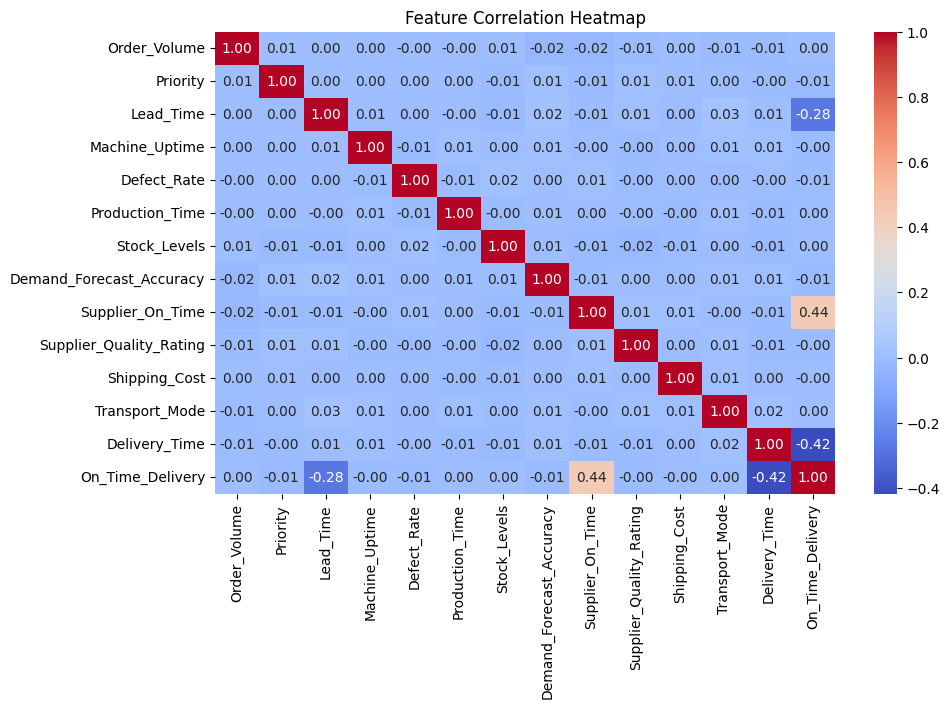

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-42-806d0d3d0eda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset["Transport_Mode"], palette="viridis")


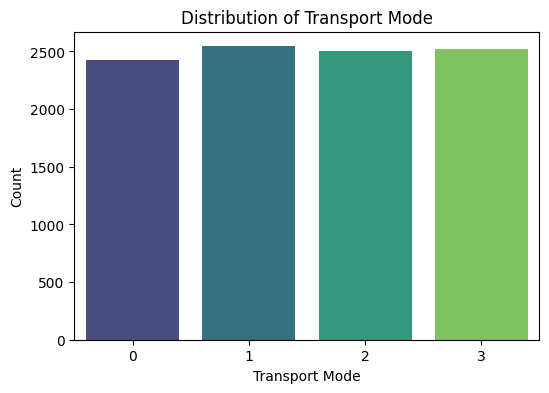

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset["Transport_Mode"], palette="viridis")
plt.title("Distribution of Transport Mode")
plt.xlabel("Transport Mode")
plt.ylabel("Count")
plt.show()

<ipython-input-43-002740a5f15c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset["Priority"], palette="viridis")


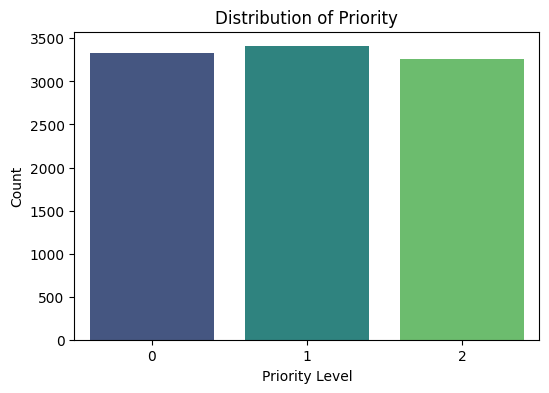

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset["Priority"], palette="viridis")
plt.title("Distribution of Priority")
plt.xlabel("Priority Level")
plt.ylabel("Count")
plt.show()

**Predictive Models**

In [ ]:
print(dataset.isnull().sum())       #Checking for missing values

Order_Volume                0
Priority                    0
Lead_Time                   0
Machine_Uptime              0
Defect_Rate                 0
Production_Time             0
Stock_Levels                0
Demand_Forecast_Accuracy    0
Supplier_On_Time            0
Supplier_Quality_Rating     0
Shipping_Cost               0
Transport_Mode              0
Delivery_Time               0
On_Time_Delivery            0
dtype: int64


In [ ]:
#Seperating data into features and target variable

#dropping columns indexed 12 and 13
#Here along with target variable On_Time_Delivery I'm also dropping Delivery_Time
#because Delivery_Time will only be known after order has been delivered
#So it cannot act as a predictor variable

X = dataset.iloc[:, 0:12]      #for factors use upper caps (X)
display (X.head())

#dropping all columns up until 13th (selecting 14th column as indexing starts from 0 so 14-1 = 13)
y = dataset.iloc[:,13]    #for output use lower caps (y)
display (y.head())

,Order_Volume,Priority,Lead_Time,Machine_Uptime,Defect_Rate,Production_Time,Stock_Levels,Demand_Forecast_Accuracy,Supplier_On_Time,Supplier_Quality_Rating,Shipping_Cost,Transport_Mode
0,394,2,3,81.608343,2.629805,5.034411,323,57.844723,73.794648,3.314095,247.486263,1
1,227,2,9,91.763824,1.949442,4.980838,23,93.486251,91.404743,4.278515,241.035278,0
2,364,1,4,80.342491,2.508567,7.186772,89,83.692943,99.291128,4.093710,199.925322,3
3,374,0,1,91.155637,1.060094,6.791240,489,81.626393,67.553755,3.740387,364.121034,3
4,467,0,11,87.004033,1.815989,2.477688,146,82.583565,64.564488,4.729925,416.526355,0


,On_Time_Delivery
0,0
1,0
2,0
3,0
4,0


# **CART**

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [ ]:
#Train Test Split

#Spilliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# test size = 0.2 ---> 20% of data is test rest is train, defining random state to synchronize randomization

In [ ]:
#Using For loop to check accuracy for different max depth values
maxdepth = [2,3,4,5,6,7,8,9]
accuracy = []
for i in maxdepth:         #Running CART for each value in maxdepth. Code explained in next box
  clf = DecisionTreeClassifier(max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

maxdepth_vs_accuracy = pd.DataFrame({'maxdepth' : maxdepth,
                                'accuracy' : accuracy,})
maxdepth_vs_accuracy

,maxdepth,accuracy
0,2,0.8490
1,3,0.8540
2,4,0.8540
3,5,0.8530
4,6,0.8500
5,7,0.8485
6,8,0.8485
7,9,0.8500


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)      #indicating we want max 3 levels of depth

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.854


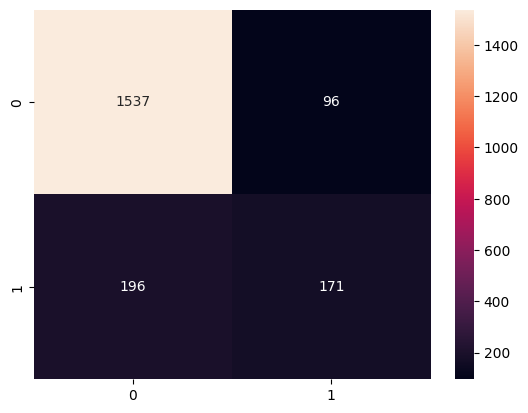

In [ ]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

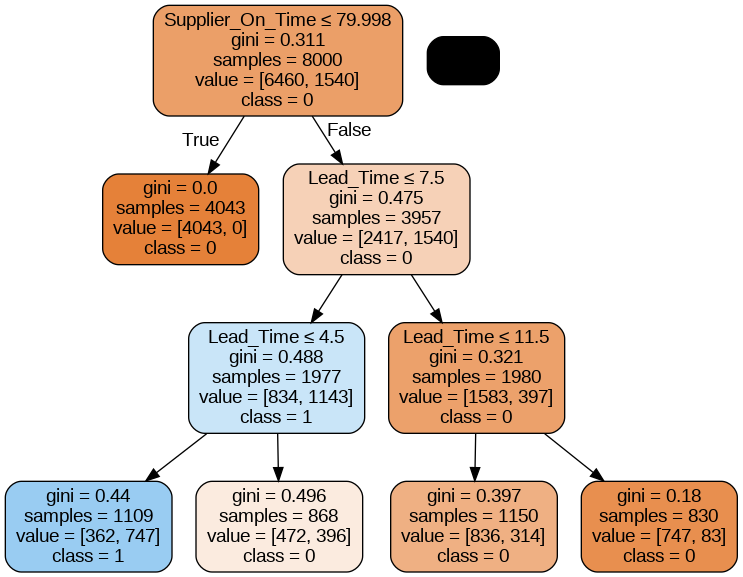

In [ ]:
!pip install six
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
feature_cols = ["Order_Volume", "Priority", "Lead_Time", "Machine_Uptime", "Defect_Rate", "Production_Time",
                               "Stock_Levels", "Demand_Forecast_Accuracy", "Supplier_On_Time", "Supplier_Quality_Rating",
                               "Shipping_Cost", "Transport_Mode"]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('deliveryontime.png')
Image(graph.create_png())

# **Neural Networks**

In [ ]:
from sklearn.preprocessing import MinMaxScaler # Z = X-XMin / (Xmax-Xmin)
scaler = MinMaxScaler()
dataset_pred = scaler.fit_transform(X_train)
dataset_pred

array([[0.15144766, 0.5       , 0.46153846, ..., 0.68797499, 0.8262786 ,
        0.66666667],
       [0.29398664, 1.        , 0.69230769, ..., 0.49925545, 0.47354716,
        0.33333333],
       [0.48775056, 0.5       , 0.84615385, ..., 0.64738596, 0.92610298,
        0.66666667],
       ...,
       [0.33853007, 0.        , 0.84615385, ..., 0.39892823, 0.93453677,
        0.66666667],
       [0.65256125, 0.5       , 0.23076923, ..., 0.05542715, 0.54982813,
        0.        ],
       [0.52115813, 0.5       , 0.07692308, ..., 0.20556353, 0.20963021,
        0.33333333]])

In [ ]:
# import keras libraries and packages
import keras
# sequential because all these layers are in a sequence
from keras.models import Sequential
# Dense implies hidden layers that we cannot access from outside
from keras.layers import Dense
# initialising the Deep Learning Model
classifier = Sequential()
# we are classifying 0 and 1s that why it is called classifier
## adding the input layer and hidden layer
## input_dimensions = 12
## the hidden layer has 11 units, weights are taken randomly from a uniform distribution and activation is ReLu
classifier.add(Dense(units = 7,kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
## kernel initializer helps python pick up weights, we call it weights but engineers call it kernel
## adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
# adding the output layer
## here the activation function is sigmoid as it is binary classification problem
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
## compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8006 - loss: 0.5253
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8030 - loss: 0.4625
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8036 - loss: 0.3782
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8285 - loss: 0.3763
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8341 - loss: 0.3637
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8263 - loss: 0.3620
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8378 - loss: 0.3520
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8312 - loss: 0.3604
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8324 - loss: 0.3652
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8358 - loss: 0.3561
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8371 - loss: 0.3558
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model on the test set
loss, accuracy = classifier.evaluate(X_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.3340
Test Accuracy: 0.8285


# **KNN**

In [ ]:
X = dataset.iloc[:, 0:12]      #specifying factors again
display (X.head())

,Order_Volume,Priority,Lead_Time,Machine_Uptime,Defect_Rate,Production_Time,Stock_Levels,Demand_Forecast_Accuracy,Supplier_On_Time,Supplier_Quality_Rating,Shipping_Cost,Transport_Mode
0,394,2,3,81.608343,2.629805,5.034411,323,57.844723,73.794648,3.314095,247.486263,1
1,227,2,9,91.763824,1.949442,4.980838,23,93.486251,91.404743,4.278515,241.035278,0
2,364,1,4,80.342491,2.508567,7.186772,89,83.692943,99.291128,4.093710,199.925322,3
3,374,0,1,91.155637,1.060094,6.791240,489,81.626393,67.553755,3.740387,364.121034,3
4,467,0,11,87.004033,1.815989,2.477688,146,82.583565,64.564488,4.729925,416.526355,0


In [ ]:
#One Hot Encoding
#The categorical variables are already label encoded in the dataset. However, since there's more than two catergories
#I will use one-hot encoding to ensure that the categories don't have a numerical ranking
#Categorical Variables: Priority (0,1,2) and Transport_Mode (0,1,2,3)

from sklearn.compose import ColumnTransformer
#Applying OneHot Encoder to Priority (column index 2) and Transport_Mode (column index 11)
ct = ColumnTransformer([
    ("Priority", OneHotEncoder(), [1]),  # OneHot Encoding Priority (Already Label-Encoded)
    ("Transport_Mode", OneHotEncoder(), [11])  # OneHot Encoding Transport_Mode (Already Label-Encoded)
], remainder='passthrough')  # Keeping other columns unchanged

#apply it on the data
X = ct.fit_transform(X)
X

#Since I'm using KNN, I don't need to drop one of the dummy columns

column_names = ct.get_feature_names_out()
column_names #Clarifying which category each of the new dummy variables corresponds to

array(['Priority__Priority_0', 'Priority__Priority_1',
       'Priority__Priority_2', 'Transport_Mode__Transport_Mode_0',
       'Transport_Mode__Transport_Mode_1',
       'Transport_Mode__Transport_Mode_2',
       'Transport_Mode__Transport_Mode_3', 'remainder__Order_Volume',
       'remainder__Lead_Time', 'remainder__Machine_Uptime',
       'remainder__Defect_Rate', 'remainder__Production_Time',
       'remainder__Stock_Levels', 'remainder__Demand_Forecast_Accuracy',
       'remainder__Supplier_On_Time',
       'remainder__Supplier_Quality_Rating', 'remainder__Shipping_Cost'],
      dtype=object)

In [ ]:
# Call the pandas dataframe command to convert the data from Numpy array to Pandas df
X = pd.DataFrame(X, columns = ["Priority_Low", "Priority_Medium", "Priority_High", "Transport_Mode_Air", "Transport_Mode_Sea", "Transport_Mode_Road", "Transport_Mode_Rail", "Order_Volume", "Lead_Time",	"Machine_Uptime",	"Defect_Rate",	"Production_Time",	"Stock_Levels",	"Demand_Forecast_Accuracy",	"Supplier_On_Time",	"Supplier_Quality_Rating",	"Shipping_Cost"])
X

,Priority_Low,Priority_Medium,Priority_High,Transport_Mode_Air,Transport_Mode_Sea,Transport_Mode_Road,Transport_Mode_Rail,Order_Volume,Lead_Time,Machine_Uptime,Defect_Rate,Production_Time,Stock_Levels,Demand_Forecast_Accuracy,Supplier_On_Time,Supplier_Quality_Rating,Shipping_Cost
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,394.0,3.0,81.608343,2.629805,5.034411,323.0,57.844723,73.794648,3.314095,247.486263
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,227.0,9.0,91.763824,1.949442,4.980838,23.0,93.486251,91.404743,4.278515,241.035278
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,364.0,4.0,80.342491,2.508567,7.186772,89.0,83.692943,99.291128,4.093710,199.925322
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,374.0,1.0,91.155637,1.060094,6.791240,489.0,81.626393,67.553755,3.740387,364.121034
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,467.0,11.0,87.004033,1.815989,2.477688,146.0,82.583565,64.564488,4.729925,416.526355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,417.0,11.0,93.018666,4.700000,9.075624,4.0,87.997546,97.507375,3.192371,199.311565
9996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,156.0,4.0,88.603296,3.853276,2.135063,471.0,71.614340,76.544693,2.284931,238.512067
9997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,314.0,11.0,87.537848,2.744782,7.164046,236.0,65.399782,74.087873,1.749338,69.368082
9998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,275.0,14.0,84.188795,2.435955,6.513077,332.0,64.228394,64.302053,1.842641,68.129155


In [ ]:
#Normalizing the data so that all datapoints are between 0 and 1
#Doing this to prevent the features with larger units from dominating the distance calculations
#Normalising the data using minmax scaling

from sklearn.preprocessing import MinMaxScaler #Z = X - Xmin/ (Xmax-XMin)
min_max_scaler = MinMaxScaler()    #assigning a variable to the funciton
Z = min_max_scaler.fit_transform(X)
Z     #Our normalised inputs, each value belongs to [0,1]

array([[0.        , 0.        , 1.        , ..., 0.34479049, 0.57853291,
        0.48458811],
       [0.        , 0.        , 1.        , ..., 0.78516989, 0.81984539,
        0.47141873],
       [0.        , 1.        , 0.        , ..., 0.98238639, 0.77360436,
        0.38749468],
       ...,
       [0.        , 1.        , 0.        , ..., 0.35212323, 0.18700697,
        0.12096819],
       [0.        , 1.        , 0.        , ..., 0.10740715, 0.21035297,
        0.11843897],
       [0.        , 0.        , 1.        , ..., 0.27604762, 0.85091132,
        0.35111833]])

In [ ]:
#Converting from array to dataframe
Z = pd.DataFrame(Z, columns = ["Priority_Low", "Priority_Medium", "Priority_High", "Transport_Mode_Air", "Transport_Mode_Sea", "Transport_Mode_Road", "Transport_Mode_Rail", "Order_Volume", "Lead_Time",	"Machine_Uptime",	"Defect_Rate",	"Production_Time",	"Stock_Levels",	"Demand_Forecast_Accuracy",	"Supplier_On_Time",	"Supplier_Quality_Rating",	"Shipping_Cost"])
Z

,Priority_Low,Priority_Medium,Priority_High,Transport_Mode_Air,Transport_Mode_Sea,Transport_Mode_Road,Transport_Mode_Rail,Order_Volume,Lead_Time,Machine_Uptime,Defect_Rate,Production_Time,Stock_Levels,Demand_Forecast_Accuracy,Supplier_On_Time,Supplier_Quality_Rating,Shipping_Cost
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.766147,0.153846,0.080331,0.516340,0.379274,0.647295,0.156814,0.344790,0.578533,0.484588
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.394209,0.615385,0.588208,0.377451,0.372575,0.046092,0.869803,0.785170,0.819845,0.471419
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.699332,0.230769,0.017026,0.491591,0.648391,0.178357,0.673893,0.982386,0.773604,0.387495
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.721604,0.000000,0.557793,0.195900,0.598936,0.979960,0.632553,0.188723,0.685197,0.722693
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.928731,0.769231,0.350170,0.350208,0.059598,0.292585,0.651701,0.113970,0.932795,0.829676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.817372,0.769231,0.650963,0.938949,0.884561,0.008016,0.760005,0.937780,0.548076,0.386242
9996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.236080,0.230769,0.430150,0.766099,0.016758,0.943888,0.432268,0.413561,0.321021,0.466268
9997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.587973,0.769231,0.376866,0.539812,0.645549,0.472946,0.307949,0.352123,0.187007,0.120968
9998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.501114,1.000000,0.209380,0.476768,0.564157,0.665331,0.284516,0.107407,0.210353,0.118439


In [ ]:
#Spilliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 0)
# test size = 0.2 ---> 20% of data is test rest is train, defining random state to synchronize randomization

In [ ]:
#Testing accuracy for different values of k
#comparing number of clusters chosen to the corresponding cluster errors

from sklearn.neighbors import KNeighborsClassifier

k_range = range(3,51,2)
accuracy = []

#A for loop for testing the data using different values of k in the specified range
for k in k_range:
  NNH = KNeighborsClassifier(metric = 'euclidean', n_neighbors=k)
  model_KNN = NNH.fit(Z_train, y_train)
  y_pred = model_KNN.predict(Z_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))   #capture the accuracy for given k

#combining the k_range and accuracy into a dataframe
k_df = pd.DataFrame({"k_value":k_range, "accuracy": accuracy})
k_df.head()

,k_value,accuracy
0,3,0.8040
1,5,0.8115
2,7,0.8225
3,9,0.8240
4,11,0.8270


In [ ]:
max_accuracy = k_df.loc[k_df['accuracy'].idxmax()]
max_accuracy

,6
k_value,15.0000
accuracy,0.8315


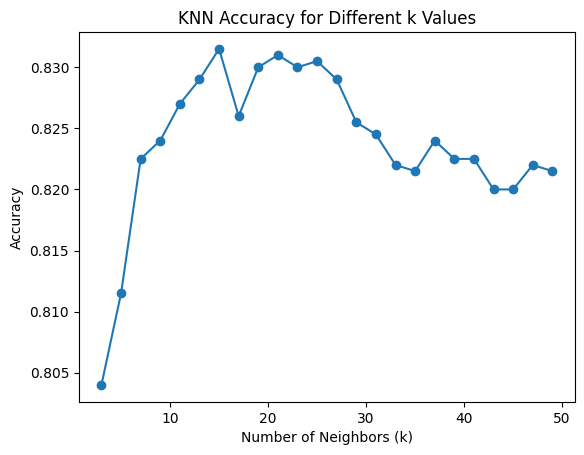

In [ ]:
#Plotting the accuracy against k_value

import matplotlib.pyplot as plt

plt.plot(k_df["k_value"], k_df["accuracy"], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()

In [ ]:
#Clearly k=15 seems to give the most accurate results
NNH = KNeighborsClassifier(metric = 'euclidean', n_neighbors=15)
#specifying no. of nearest neighbors as 15

model_KNN = NNH.fit(Z_train, y_train)

Accuracy: 0.8315


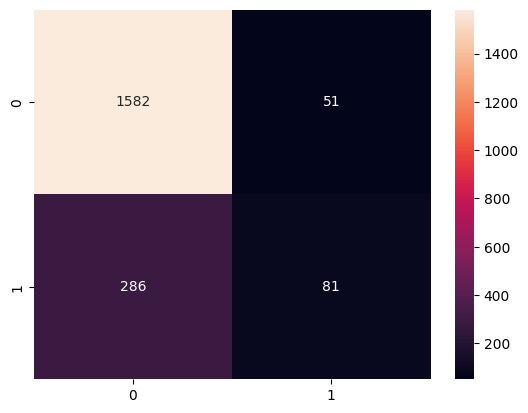

In [ ]:
import seaborn as sns
from sklearn import metrics
y_pred = model_KNN.predict(Z_test)
y_pred = (y_pred>0.50)     #Converting predictions to binary (although KNN already returns discrete 0/1)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

# **Naive Bayes**

In [ ]:
from sklearn.preprocessing import MinMaxScaler #Z = X - Xmin/ (Xmax-XMin)
min_max_scaler = MinMaxScaler()    #assigning a variable to the funciton
Z = min_max_scaler.fit_transform(X)
Z     #Our normalised inputs, each value belongs to [0,1]

array([[0.        , 0.        , 1.        , ..., 0.34479049, 0.57853291,
        0.48458811],
       [0.        , 0.        , 1.        , ..., 0.78516989, 0.81984539,
        0.47141873],
       [0.        , 1.        , 0.        , ..., 0.98238639, 0.77360436,
        0.38749468],
       ...,
       [0.        , 1.        , 0.        , ..., 0.35212323, 0.18700697,
        0.12096819],
       [0.        , 1.        , 0.        , ..., 0.10740715, 0.21035297,
        0.11843897],
       [0.        , 0.        , 1.        , ..., 0.27604762, 0.85091132,
        0.35111833]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
nativeClassifier=GaussianNB()
nb_classifier = nativeClassifier.fit(Z_train, y_train)
y_pred = nb_classifier.predict(Z_test)

Accuracy: 0.845


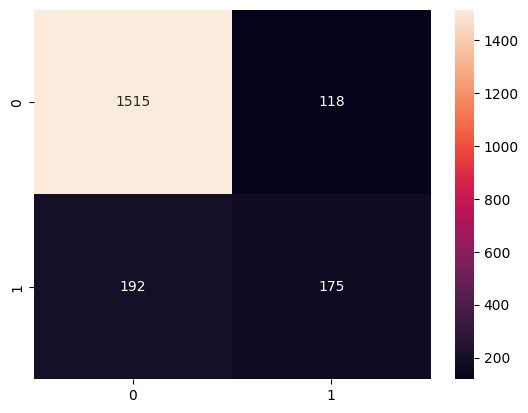

In [ ]:
import seaborn as sns
from sklearn import metrics
y_pred = nb_classifier.predict(Z_test)
y_pred = (y_pred>0.50)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');